# Blinket Analysis

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Raw Data 

In [84]:
df = pd.read_csv("C:/datas/blinkit_data.csv")

### Sample Data 

In [85]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [86]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


### Data Size


In [87]:
print("Size of Dataset:" , df.shape )

Size of Dataset: (8523, 12)


### Field Info


In [88]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [89]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### Cleaning Dataset

In [90]:
df["Item Fat Content"] = df["Item Fat Content"].replace({"LF" : "Low Fat", "low fat" : "Low Fat", "reg" : "Regular"})

In [91]:
print(df["Item Fat Content"].unique())

['Regular' 'Low Fat']


## Business Requirements

### KPI's Requirements

In [92]:
# Total sales
Total_sales = df["Sales"].sum()
print(f"Total Sales: ${Total_sales:,.1f}")

# Average sales
Average_sales = df["Sales"].mean()
print(f"Average Sales: ${Average_sales:,.1f}")

# Number of Items
Number_of_Items = df["Sales"].count()
print(f"Number of Items: {Number_of_Items:,.0f}")

# Average Rating
Average_Rating = df["Rating"].mean()
print(f"Average Rating: {Average_Rating:,.1f}")



Total Sales: $1,201,681.5
Average Sales: $141.0
Number of Items: 8,523
Average Rating: 4.0


### Charts Requirements

####  Total Sales by Fat Content

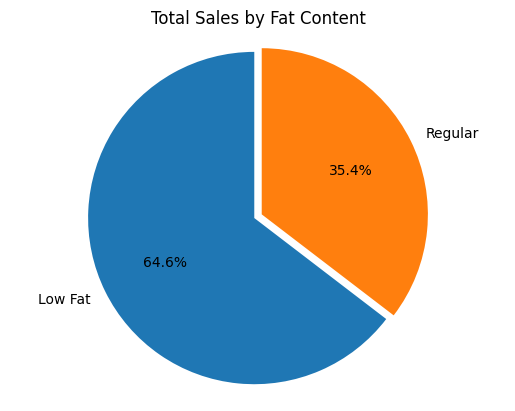

In [93]:
total_sales_by_fat = df.groupby("Item Fat Content")["Sales"].sum()
plt.pie(total_sales_by_fat, labels= total_sales_by_fat.index,  autopct= "%1.1f%%", startangle= 90, explode=(0.05,0.0))
plt.axis("equal")
plt.title("Total Sales by Fat Content")
plt.show()

####   Total Sales by Item Type

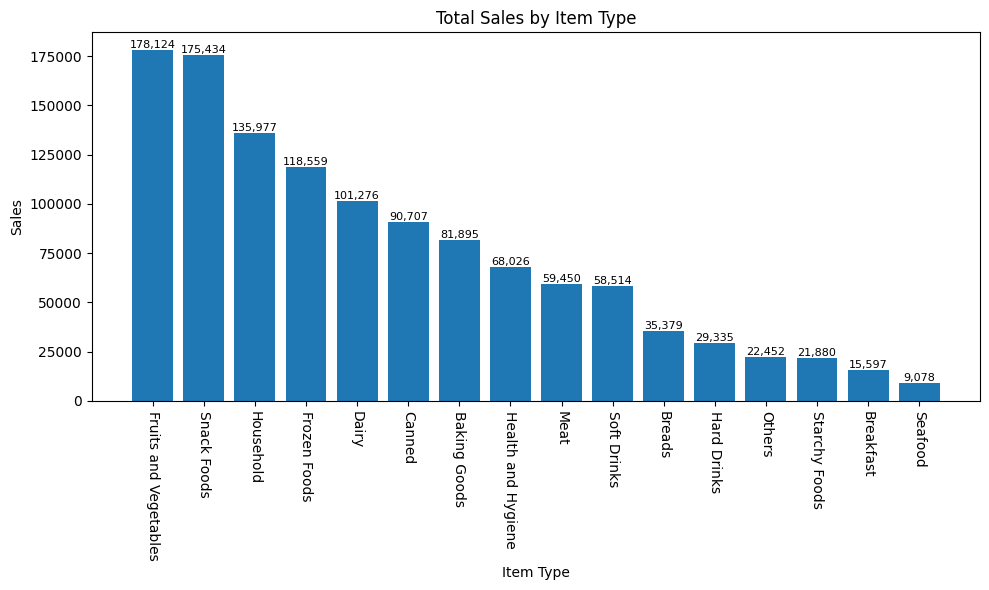

In [94]:
total_sales_by_item = df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars= plt.bar(total_sales_by_item.index,total_sales_by_item)
plt.xticks(rotation= -90)
plt.xlabel("Item Type")
plt.ylabel("Sales")   
plt.title("Total Sales by Item Type")
plt.tight_layout()

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
      f"{bar.get_height():,.0f}" , ha= "center", va= "bottom", fontsize=8)
plt.show()

####    Fat Content by Outlet for Total Sales

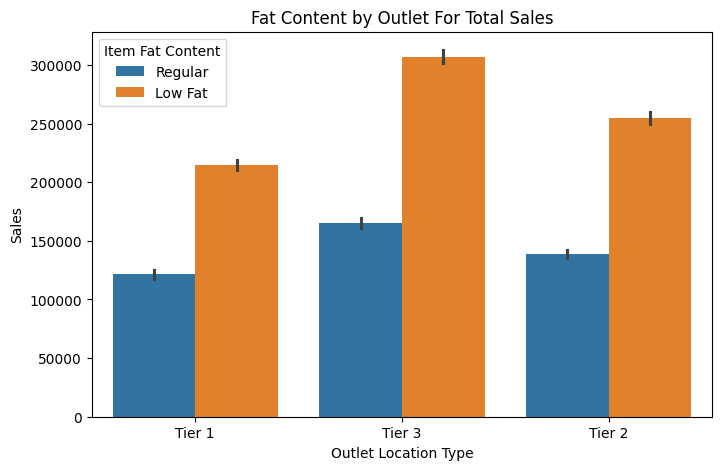

In [95]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Outlet Location Type", y="Sales", hue="Item Fat Content", estimator=sum)
plt.title("Fat Content by Outlet For Total Sales")
plt.legend(title="Item Fat Content", loc= "upper left")

####    Total Sales by Outlet Establishment


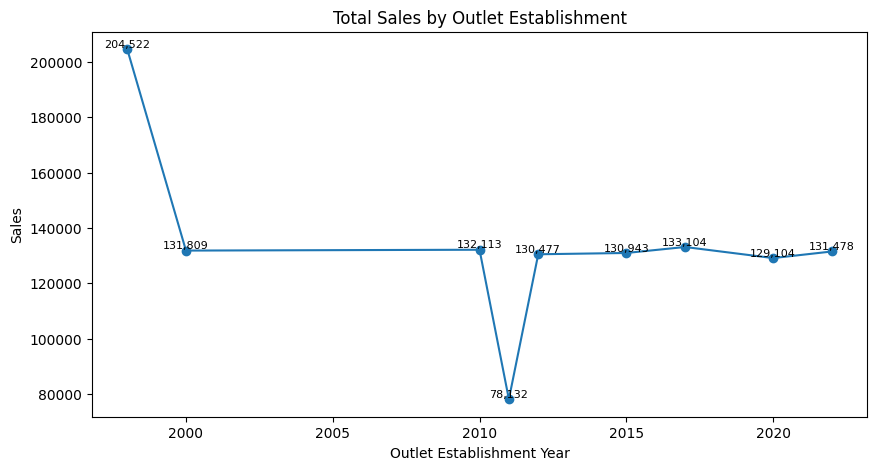

In [96]:
sales_by_year= df.groupby("Outlet Establishment Year")["Sales"].sum()
plt.figure(figsize=(10,5))

plt.title("Total Sales by Outlet Establishment")
plt.plot(sales_by_year.index, sales_by_year.values, marker="o", linestyle = "-")

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x,y, f"{y:,.0f}", ha="center", va="bottom", fontsize=8)
    
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Sales")
plt.show()

####     Sales by Outlet Size


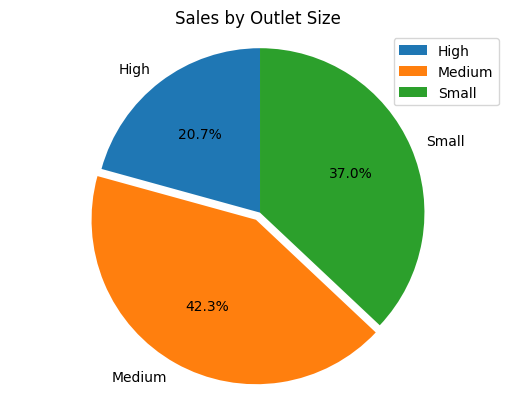

In [97]:
sales_by_size= df.groupby("Outlet Size")["Sales"].sum()
plt.pie(sales_by_size, labels=sales_by_size.index, startangle=90, autopct="%1.1f%%", explode=(0.0,0.05,0.0 ) )
plt.legend()
plt.axis("equal")
plt.title("Sales by Outlet Size")
plt.show()

####    Sales by Outlet Location:



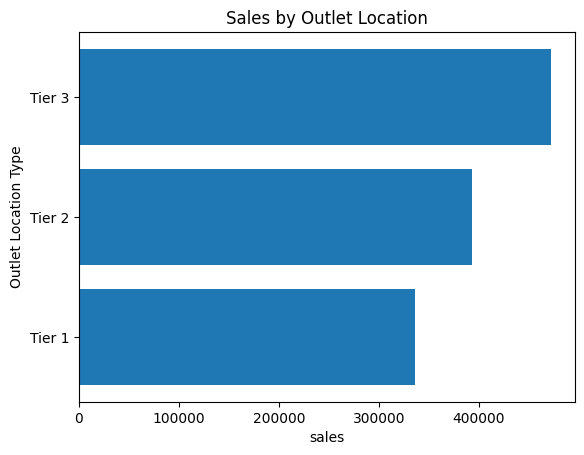

<Figure size 800x500 with 0 Axes>

In [110]:
sales_by_location= df.groupby("Outlet Location Type")["Sales"].sum() 

pbar=plt.barh(sales_by_location.index, sales_by_location)

plt.title("Sales by Outlet Location") 
plt.xlabel("sales")
plt.ylabel("Outlet Location Type")

plt.figure(figsize=(8,5))
 

plt.show()